# 해쉬태그 데이터로 워드클라우드 만들기

In [4]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [5]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 제주핫플레이스.csv to 제주핫플레이스.csv


In [6]:
import pandas as pd
raw_df = pd.read_csv(filename)
raw_df.tags[:3]

0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1    ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2    ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
Name: tags, dtype: object

In [7]:
tags =raw_df.tags[0]
tags

"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도핫플', '#제주여행코스', '#제주공항', '#제주도맛집', '#제주맛집', '#제주스냅', '#제주풍경', '#제주사진', '#제주카페', '#제주도카페', '#산굼부리', '#제주도바다', '#귤체험', '#우도', '#제주관광', '#제주도여향지', '#제주여행중', '#삼육오빠', '#제주앓이']"

In [8]:
tags[2:-2].split("', '")[:5]

['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳']

In [9]:
a =['#시작']
a.extend(tags[2:-2].split("', '")[:5])
a

['#시작', '#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳']

In [10]:
tags_total = []
for tags in raw_df.tags:
    tags_total.extend(tags[2:-2].split("', "))


## 해쉬태그 출현 빈도
- collections 모듈

In [11]:
from collections import Counter, OrderedDict

In [12]:
s = 'A quick brown'
Counter(s)


Counter({' ': 2,
         'A': 1,
         'b': 1,
         'c': 1,
         'i': 1,
         'k': 1,
         'n': 1,
         'o': 1,
         'q': 1,
         'r': 1,
         'u': 1,
         'w': 1})

In [13]:
sl = ['AI', 'quick', 'brown']
Counter(sl)

Counter({'AI': 1, 'brown': 1, 'quick': 1})

In [14]:
od = OrderedDict()
od['x'] = 1
od['k'] = 2
od['m'] = 3
od

OrderedDict([('x', 1), ('k', 2), ('m', 3)])

In [15]:
d = dict()
d['x'] = 1
d['k'] = 2
d['m'] = 3
d

{'k': 2, 'm': 3, 'x': 1}

In [16]:
for k,v in od.items():
    print(k,v)

x 1
k 2
m 3


In [17]:
tag_counts = Counter(tags_total)

In [18]:
# Top 50
tag_counts.most_common(50)

[("'#제주맛집", 3179),
 ("'#제주도맛집", 3007),
 ("'#제주여행", 2805),
 ("'#제주관광", 2751),
 ("'#제주도", 1669),
 ("'#제주도여행", 1399),
 ("'#서귀포맛집", 1312),
 ("'#제주", 1128),
 ("'#제주도가볼만한곳", 1003),
 ("'#제주핫플레이스", 830),
 ("'#서귀포", 816),
 ("'#jeju", 725),
 ("'#제주맛집추천", 673),
 ("'#제주도흑돼지맛집", 663),
 ("'#제주흑돼지맛집", 662),
 ("'#일상", 648),
 ("'#제주도흑돼지", 647),
 ("'#성산일출봉", 643),
 ("'#제주흑돼지", 641),
 ("'#협재맛집", 599),
 ("'#제주카페", 591),
 ("'#제주도그램", 591),
 ('', 587),
 ("'#서귀포흑돼지맛집", 586),
 ("'#서귀포흑돼지", 570),
 ("'#제주도민", 560),
 ("'#섭지코지", 553),
 ("'#성산일출봉맛집", 540),
 ("'#섭지코지맛집", 511),
 ("'#제주가볼만한곳", 494),
 ("'#선팔", 487),
 ("'#제주통갈치구이", 485),
 ("'#제주서귀포맛집", 479),
 ("'#제주도민맛집", 476),
 ('#통갈치구이', 475),
 ("'#제주살이", 471),
 ("'#여행스타그램", 459),
 ("'#제주도관광", 440),
 ("'#제주눈썹문신", 434),
 ("'#제주반영구", 425),
 ("'#서귀포눈썹문신", 419),
 ("'#제주시", 412),
 ("'#여행", 410),
 ('#제주', 410),
 ("'#반영구", 405),
 ("'#눈썹문신", 405),
 ("'#제주핫플", 404),
 ("'#제주스타그램", 401),
 ("'#제주일상", 395),
 ("'#중문맛집", 387)]

In [19]:
# 데이터 정제하기
stopwords = ['#jeju', '#일상', '', '#제주', '#제주도', '#선팔', 
             '제주눈썹문신', '#반영구', '#눈썹문신', '#제주자연눈썹',
             '#제주눈썹문신', '#제주반영구', '#서귀포눈썹문신', '#반영구', '#눈썹문신']

'''tag_total_refined = []
for tag in tags_total:
    if tag not in stopwords:
        tag_total_refined.append(tag)'''

tags_total=[tag for tag in tags_total if tag not in stopwords]

tag_counts = Counter(tags_total)
tag_counts.most_common(50)

[("'#제주맛집", 3179),
 ("'#제주도맛집", 3007),
 ("'#제주여행", 2805),
 ("'#제주관광", 2751),
 ("'#제주도", 1669),
 ("'#제주도여행", 1399),
 ("'#서귀포맛집", 1312),
 ("'#제주", 1128),
 ("'#제주도가볼만한곳", 1003),
 ("'#제주핫플레이스", 830),
 ("'#서귀포", 816),
 ("'#jeju", 725),
 ("'#제주맛집추천", 673),
 ("'#제주도흑돼지맛집", 663),
 ("'#제주흑돼지맛집", 662),
 ("'#일상", 648),
 ("'#제주도흑돼지", 647),
 ("'#성산일출봉", 643),
 ("'#제주흑돼지", 641),
 ("'#협재맛집", 599),
 ("'#제주카페", 591),
 ("'#제주도그램", 591),
 ("'#서귀포흑돼지맛집", 586),
 ("'#서귀포흑돼지", 570),
 ("'#제주도민", 560),
 ("'#섭지코지", 553),
 ("'#성산일출봉맛집", 540),
 ("'#섭지코지맛집", 511),
 ("'#제주가볼만한곳", 494),
 ("'#선팔", 487),
 ("'#제주통갈치구이", 485),
 ("'#제주서귀포맛집", 479),
 ("'#제주도민맛집", 476),
 ('#통갈치구이', 475),
 ("'#제주살이", 471),
 ("'#여행스타그램", 459),
 ("'#제주도관광", 440),
 ("'#제주눈썹문신", 434),
 ("'#제주반영구", 425),
 ("'#서귀포눈썹문신", 419),
 ("'#제주시", 412),
 ("'#여행", 410),
 ("'#반영구", 405),
 ("'#눈썹문신", 405),
 ("'#제주핫플", 404),
 ("'#제주스타그램", 401),
 ("'#제주일상", 395),
 ("'#중문맛집", 387),
 ("'#맞팔", 387),
 ("'#먹스타그램", 386)]

## 워드 클라우드 만들기

In [21]:
# 코랩

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [23]:

! ls -l /usr/share/fonts/truetype/nanum/

total 28836
-rw-r--r-- 1 root root 4413912 Dec  3  2017 NanumBarunGothicBold.ttf
-rw-r--r-- 1 root root 4184028 Dec  3  2017 NanumBarunGothic.ttf
-rw-r--r-- 1 root root 4642244 Dec  3  2017 NanumGothicBold.ttf
-rw-r--r-- 1 root root 4691820 Dec  3  2017 NanumGothic.ttf
-rw-r--r-- 1 root root 4183592 Dec  3  2017 NanumMyeongjoBold.ttf
-rw-r--r-- 1 root root 3839464 Dec  3  2017 NanumMyeongjo.ttf
-rw-r--r-- 1 root root  733500 Dec  3  2017 NanumSquareB.ttf
-rw-r--r-- 1 root root 1030948 Dec  3  2017 NanumSquareRoundB.ttf
-rw-r--r-- 1 root root 1063276 Dec  3  2017 NanumSquareRoundR.ttf
-rw-r--r-- 1 root root  723640 Dec  3  2017 NanumSquareR.ttf


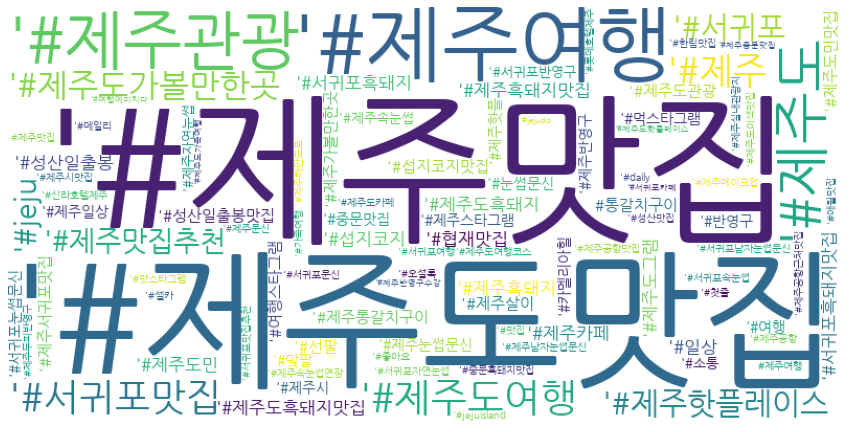

In [24]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(font_path=path,
                      background_color='white',
                      max_words=100,
                      relative_scaling=0.3,
                      width=800, height=400
                      ).generate_from_frequencies(tag_counts)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()